# Titanic - Machine Learning from Disaster

使用 [Kaggle Titanic](https://www.kaggle.com/c/titanic/overview) 所提供的資料，根據鐵達尼號乘客資料預測生還者。
我們只使用 `train.csv` 進行生還者預測（只有 `train.csv` 才有答案），而加分題需要額外使用 `test.csv` 並提交至 [Kaggle Titanic](https://www.kaggle.com/c/titanic/overview) 進行評分。

需要先學習[程式教材](https://github.com/IKMLab/course_material)中的以下部份：

- [jupyter-基本功能](https://github.com/IKMLab/course_material/blob/master/jupyter-%E5%9F%BA%E6%9C%AC%E5%8A%9F%E8%83%BD.ipynb)
- [python-入門語法](https://github.com/IKMLab/course_material/blob/master/python-%E5%85%A5%E9%96%80%E8%AA%9E%E6%B3%95.ipynb)
- [numpy-基本功能](https://github.com/IKMLab/course_material/blob/master/numpy-%E5%9F%BA%E6%9C%AC%E5%8A%9F%E8%83%BD.ipynb)
- [pandas-基本功能](https://github.com/IKMLab/course_material/blob/master/pandas-%E5%9F%BA%E6%9C%AC%E5%8A%9F%E8%83%BD.ipynb)
- [matplotlib-資料視覺化](https://github.com/IKMLab/course_material/blob/master/matplotlib-%E8%B3%87%E6%96%99%E8%A6%96%E8%A6%BA%E5%8C%96.ipynb)
- [scikit-learn-基本功能](https://github.com/IKMLab/course_material/blob/master/scikit-learn-%E5%9F%BA%E6%9C%AC%E5%8A%9F%E8%83%BD.ipynb)

## 環境

請填寫當前執行使用的環境。

|環境|名稱|版本|
|-|-|-|
|作業系統|Colab||
|程式執行環境|Colab||
|python 版本|python3|3.7.13|
|安裝環境|pip|21.1.3|

In [97]:
!python --version
!pip --version

Python 3.7.13
pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


## 安裝

請填寫安裝套件需要的指令

```sh
pip install -r requirements.txt
```

## 計算資源

請填寫執行程式所需要的計算資源，請確保所有資源限制在單一個人桌上型電腦且能夠以總市價低於 5 萬的手段取得。

|計算資源|答案|
|-|-|
|使用 CPU 核心數|Colab|
|記憶體需求|Colab|
|有無使用 GPU|無|
|GPU 版本|無|
|GPU 記憶體需求|無|

## 參考連結

- 有無參考他人之實驗結果：有
- 參考連結：

  https://yulongtsai.medium.com/https-medium-com-yulongtsai-titanic-top3-8e64741cc11f

  https://colab.research.google.com/github/AI-FREE-Team/Data-Analytics-in-Practice-Titanic/blob/master/Data%20Analytics%20in%20Practice%20-%20Titanic%20Survival%20Prediction.ipynb

  https://www.kaggle.com/konstantinmasich/titanic-0-82-0-83/

  https://yulongtsai.medium.com/https-medium-com-yulongtsai-titanic-top3-8e64741cc11f

  https://www.kaggle.com/dantefilu/keras-neural-network-a-hitchhiker-s-guide-to-nn

  https://www.kaggle.com/vaishvik25/titanic-eda-fe-3-model-decision-tree-viz

  https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial

  https://www.kaggle.com/pliptor/divide-and-conquer-0-82296

  https://www.kaggle.com/ylt0609/recursive-forward-elimination-workflow-to-0-82296
  

In [98]:
# 請勿更動此區塊程式碼

import time
import numpy as np
import pandas as pd

EXECUTION_START_TIME = time.time() # 計算執行時間

df = pd.read_csv('train.csv')      # 讀取資料，請勿更改路徑

In [99]:
df_test = pd.read_csv("test.csv") #把test的數據一起拿進來，一起進行資料處理，在填補資料時會更準確
df_data = df.append(df_test) #合併成一個完整資料集

## 資料分析與前處理

請在此區塊後使用**一個或多個區塊**進行資料分析與前處理，項目可以包含：

- 資料視覺化
- 相關係數
- 決定輸入特徵
- 處理缺失值
- 轉換數值
- 轉換類別
- 其他

請以 `markdown` 簡單描述**流程**、**方法**與**原因**：

1. 觀察...，發現...
2. 填補...，策略...
3. 轉換...，原因...

#觀察資料

首先列出train.csv中的資料，分別有：
1. PassengerId　(乘客編號)
2. Survived (是否存活)
3. Pclass (艙等)
4. Name　(姓名)
5. Sex (性別)
6. Age (年齡)
7. SibSp (兄弟姊妹、配偶人數)
8. Parch (父母子女人數)
9. Ticket (船票號碼)
10. Fare (票價)
11. Cabin (船艙號碼)
12. Embarked (登記港口)

觀看這些資料後可初步判斷：

- 初步判斷PassengerId、Name、Ticket、Embarked可能為無相關資料

使用pd函式來做train.csv資料的統計：

- 可以發現有int64、float64、object三種型態

- 在Age、Fare、Cabin、Embarked部分資料有缺失


In [100]:
print(pd.DataFrame({'null': df_data.isnull().sum()}))
df_data.head(10)

             null
PassengerId     0
Survived      418
Pclass          0
Name            0
Sex             0
Age           263
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin        1014
Embarked        2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#資料分析

- 利用describe( )函數得到各數值型態欄位的統計量
  - 觀察欄位的scale是否相似、以及資料分布是否有離群值，可幫助後續資料處理
- 將各欄位資料做初步視覺化分析


In [101]:
display(df_data.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


圖表可看到約只有38.38%的人存活

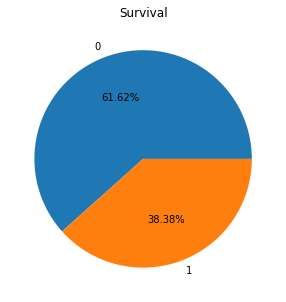

In [102]:
# 繪圖相關套件
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns

plt.figure( figsize=(10,5) )
df['Survived'].value_counts().plot( kind='pie', autopct='%1.2f%%' )
plt.title( 'Survival' )  # 圖標題
plt.ylabel( '' )
plt.show()

先分析較簡單的資料，可看到：
- Pclass
  - 艙等存活率 1 > 2 > 3 　
  - 判斷艙等較高的存活率較高，可能跟社會地位有關
- Sex
  - 女性存活率較高，應為逃難時女性優先的緣故
- SibSp、Parch
  - 較多家庭成員的存活率較高，故之後合併此兩個特徵
- Embarked
  - 存活率 C > Q > S 
  - 照理來說登船港口應與存活率無關，推測可能是因為不同港口登船的人社會地位不同
- Age
  - 小孩的存活率較高

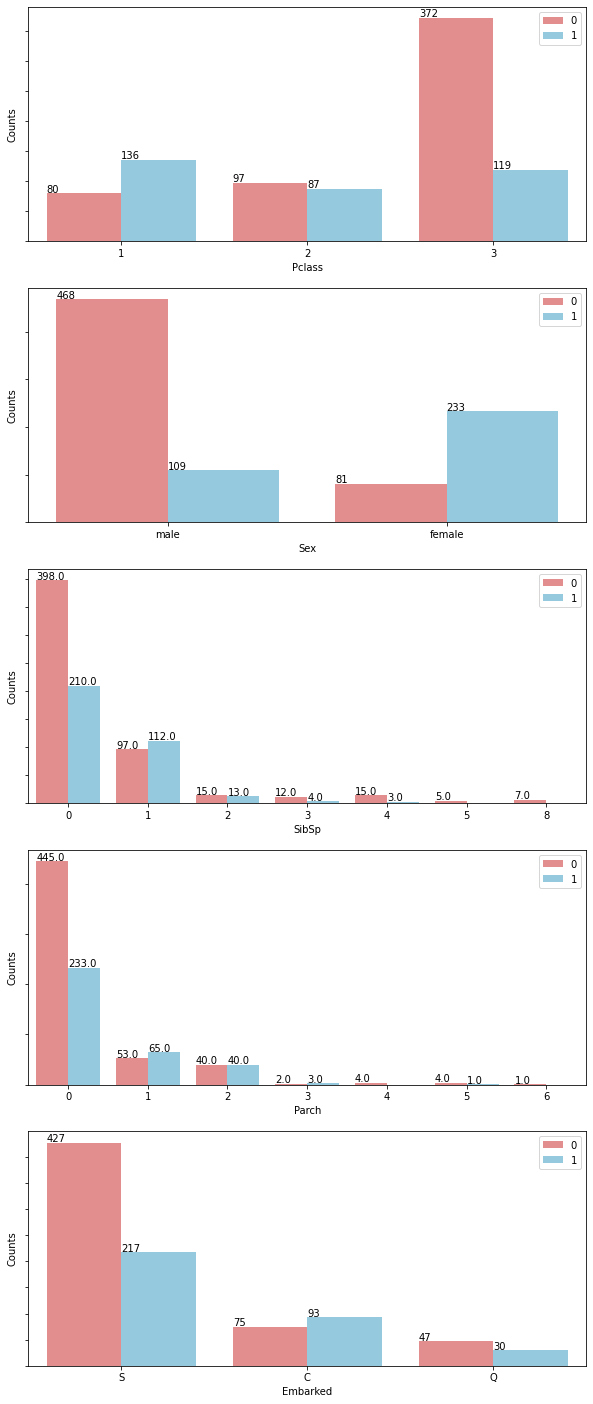

In [103]:
selected_cols = ['Pclass','Sex','SibSp','Parch','Embarked']

plt.figure( figsize=(10,len(selected_cols)*5) )
gs = gridspec.GridSpec(len(selected_cols),1)    
for i, col in enumerate( df[selected_cols] ) :        
  ax = plt.subplot( gs[i] )
  sns.countplot( x=df[col], hue=df.Survived, palette=['lightcoral','skyblue'] )
  ax.set_yticklabels([])
  ax.set_ylabel( 'Counts' )
  ax.legend( loc=1 )   # upper right:1 ; upper left:2
  for p in ax.patches:
    ax.annotate( '{:,}'.format(p.get_height()), (p.get_x(), p.get_height()+1.5) )


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age vs Survived')

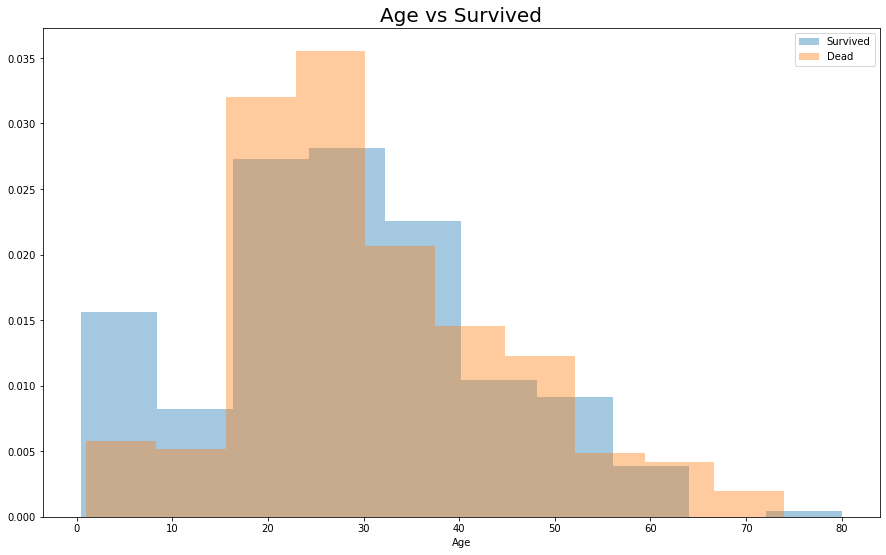

In [104]:
df_data['Has_Age'] = df_data['Age'].isnull().map(lambda x : 0 if x == True else 1)
# Masks
Age_Survived = ( (df_data.Has_Age == 1) & (df_data.Survived == 1) )
Age_Dead = ( (df_data.Has_Age == 1)  & (df_data.Survived == 0) )
# Plot
fig, ax = plt.subplots( figsize = (15,9) )
ax = sns.distplot(df_data.loc[Age_Survived, 'Age'],kde=False,bins=10,norm_hist=True,label='Survived') 
ax = sns.distplot(df_data.loc[Age_Dead, 'Age'],kde=False,bins=10,norm_hist=True,label='Dead')
ax.legend()
ax.set_title('Age vs Survived',fontsize = 20)

- 處理缺失值 
  - 原本想用最常出現的數值來填補，降低填補錯的可能性
  - 後來考慮到缺失的資料Age、Fare較離散，因此改用中位數，以減少誤差
  - 最後Age參考其他人做法，使用Title來協助判斷中位數，再度減少誤差
  - 也有嘗試使用RandomForestRegressor做Age的填補
  - 在Cabin部分因為缺失過多，在觀察資料後發現有Cabin的人生存率較高，因此轉換成有無Cabin的類別特徵
  - 在Embarked部分，使用最常出現的S填補
- 轉換數值資料
  - 將Fare資料依照區間切成4份，使得資料可以提供相關性，同時降低overfitting的可能
  - 將Age資料依照區間切成4份，使得資料可以提供相關性，同時降低overfitting的可能
  - 同時也有嘗試將Fare、Age資料做標準化，使得大小分布在0~1之間
  - 將Family轉換為新特徵，Alone，判斷是否一個人出遊
    - 根據前面Family圖表可看出，當個人出遊的時候死亡率較高，2~4人時較低，後續則資料過少無法判斷
- 轉換類別資料
  - 將Sex換成1、0
  - 將Embarked使用熱邊碼分成Q、S、C
  - Cabin部分分成有無Cabin
- 其他方法 (對資料進行處理，以此創造新特徵)
  - 創造Family特徵，為SibSp + Parch + 1 ，合併相近的SibSp、Parch兩種特徵
  - 創造Alone特徵，判斷是否1個人，因為獨自1人的存活率較低
  - 創造Minor特徵，判斷Age使否小於18 (因為資料分析發現兒童較容易存活)
  - 創造Title特徵，大致區分不同稱謂的人
  - 創造Connected_Survival特徵
    - 根據船票號碼相同來決定是否一群，再根據同一群人中是否有無存活來分成1、0.5、0，分別為有存活、未知、無存活
- 計算各欄位資料的相關係數

In [105]:
#轉換性別資料
df_data['Sex'] = df_data['Sex'].map({'female' : 1, 'male' : 0}).astype('int')

In [106]:
#填補Embarked
df_data['Embarked'] = df_data['Embarked'].fillna('S')
# OneHot Encoding
OneHot_Embarked = pd.get_dummies( df_data.Embarked, prefix='Embarked' )
df_data = pd.concat( [ df_data, OneHot_Embarked ], axis=1 )

In [107]:
#處理Cabin缺失、轉換成類別資料
df_data['Cabin'].loc[ (df_data['Cabin'].notnull()) ] = 1
df_data['Cabin'].loc[ (df_data['Cabin'].isnull()) ] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [108]:
from sklearn.preprocessing import LabelEncoder

#填補Fare
df_data['Fare'] = df_data['Fare'].fillna(df_data['Fare'].median())
#分成4、5、6等分
df_data['FareBin_4'] = pd.qcut(df_data['Fare'], 4)
df_data['FareBin_5'] = pd.qcut(df_data['Fare'], 5)
df_data['FareBin_6'] = pd.qcut(df_data['Fare'], 6)
#轉成類別
le = LabelEncoder()
df_data['FareBin_4'] = le.fit_transform(df_data['FareBin_4'])
df_data['FareBin_5'] = le.fit_transform(df_data['FareBin_5'])
df_data['FareBin_6'] = le.fit_transform(df_data['FareBin_6'])

In [109]:
# 創造新的特徵: 稱謂(Title)
df_data['Title'] = df_data['Name']
for name_string in df_data['Name']:
  df_data['Title'] = df_data['Name'].str.extract('([A-Za-z]+)\.', expand=True) #抓出名字中Title

#print(df_data['Title'].unique()) #觀察Title種類

#處理較少出現、性質相同的Title
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df_data.replace({'Title': mapping}, inplace=True)

#採用姓名中相同Title的年齡中位數來填補Age
title_list = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in title_list:
  age_impute = df_data.groupby('Title')['Age'].median()[title_list.index(title)]
  df_data.loc[(df_data['Age'].isnull()) & (df_data['Title'] == title), 'Age'] = age_impute

根據不同Title的存活率，將稱謂轉換成0、1、2、3、4

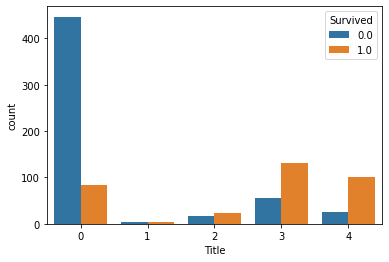

In [110]:
#將Title轉換成數值資料
df_data['Title'] = df_data['Title'].map({'Mr':0, 'Rev':0, 'Dr':1, 'Master':2, 'Miss':3, 'Mrs':4})
sns.countplot(x= df_data['Title'], hue= df_data['Survived'])

In [111]:
from sklearn.preprocessing import LabelEncoder

#分成4、5、6等分
df_data['AgeBin_4'] = pd.qcut(df_data['Age'], 4)
df_data['AgeBin_5'] = pd.qcut(df_data['Age'], 5)
df_data['AgeBin_6'] = pd.qcut(df_data['Age'], 6)
#轉成類別
le = LabelEncoder()
df_data['AgeBin_4'] = le.fit_transform(df_data['AgeBin_4'])
df_data['AgeBin_5'] = le.fit_transform(df_data['AgeBin_5'])
df_data['AgeBin_6'] = le.fit_transform(df_data['AgeBin_6'])

In [112]:
#創造新的特徵: 生存連結(Connected_Survival)
df_data['Connected_Survival'] = 0.5  #預設為0.5
for _, df_grp in df_data.groupby('Ticket'):
  if (len(df_grp) > 1):
    for ind, row in df_grp.iterrows():
      smax = df_grp.drop(ind)['Survived'].max()
      smin = df_grp.drop(ind)['Survived'].min()
      passID = row['PassengerId']
      if (smax == 1.0):
        df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 1  #如果有人存活則為1
      elif (smin == 0.0):
        df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 0  #如果無人存活，且有人死亡則為0

print('有生存連結人數:',df_data[df_data['Connected_Survival']!=0.5].shape[0])
df_data.groupby('Connected_Survival')[['Survived']].mean().round(3)

有生存連結人數: 496


,Survived
Connected_Survival,
0.0,0.225
0.5,0.298
1.0,0.728


In [113]:
# 創造新的特徵：家庭人數(Family)
df_data['Family'] = df_data['SibSp'] + df_data['Parch'] + 1

# 創造新的特徵: 未成年(Minor)
df_data['Minor'] = np.where(df_data['Age']<=18, 1, 0)

# 創造新的特徵: 單獨旅遊(Alone)
df_data['Alone'] = np.where(df_data['Family']>1, 0, 1)

In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#將Age離散化
age_sc = sc.fit(df_data['Age'].values.reshape(-1,1))
df_data['Age_sc'] = sc.fit_transform(df_data['Age'].values.reshape(-1,1), age_sc)
#將Fare離散化
fare_sc = sc.fit(df_data['Fare'].values.reshape(-1,1))
df_data['Fare_sc'] = sc.fit_transform(df_data['Fare'].values.reshape(-1,1), fare_sc)

確認各類別資料無遺漏

In [115]:
print(pd.DataFrame({'null': df_data.isnull().sum()}))

                    null
PassengerId            0
Survived             418
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Has_Age                0
Embarked_C             0
Embarked_Q             0
Embarked_S             0
FareBin_4              0
FareBin_5              0
FareBin_6              0
Title                  0
AgeBin_4               0
AgeBin_5               0
AgeBin_6               0
Connected_Survival     0
Family                 0
Minor                  0
Alone                  0
Age_sc                 0
Fare_sc                0


**計算相關係數，以輔助後續特徵之選擇**

In [116]:
# Survied 與其他欄位間的相關係數
Corr_Matrix = df_data.corr()  # 計算相關係數
Corr_Matrix = abs(Corr_Matrix)
Corr = Corr_Matrix.loc['Survived',:].sort_values()[:-1]
Corr = pd.DataFrame({ 'Survived':Corr })
Corr

,Survived
Embarked_Q,0.003650
PassengerId,0.005007
AgeBin_4,0.014851
Family,0.016639
AgeBin_6,0.018090
AgeBin_5,0.021639
SibSp,0.035322
Age_sc,0.076308
Age,0.076308
Parch,0.081629


#資料分析 (處理後)

再做一次資料視覺化分析:
- AgeBin
  - 不同年齡層存活率不同
- Family
  - 獨自1人存活率最低，2~4人存活率較高
- FareBin
  - 票價越高存活率越高
- Embarked
  - 港口S的分布圖最不相同，可能較具有訓練價值
- Cabin
  - 有Cabin資料的存活率較高
- Alone
  - 獨自一人存活率較低
- Minor
  - 小孩存活率較高

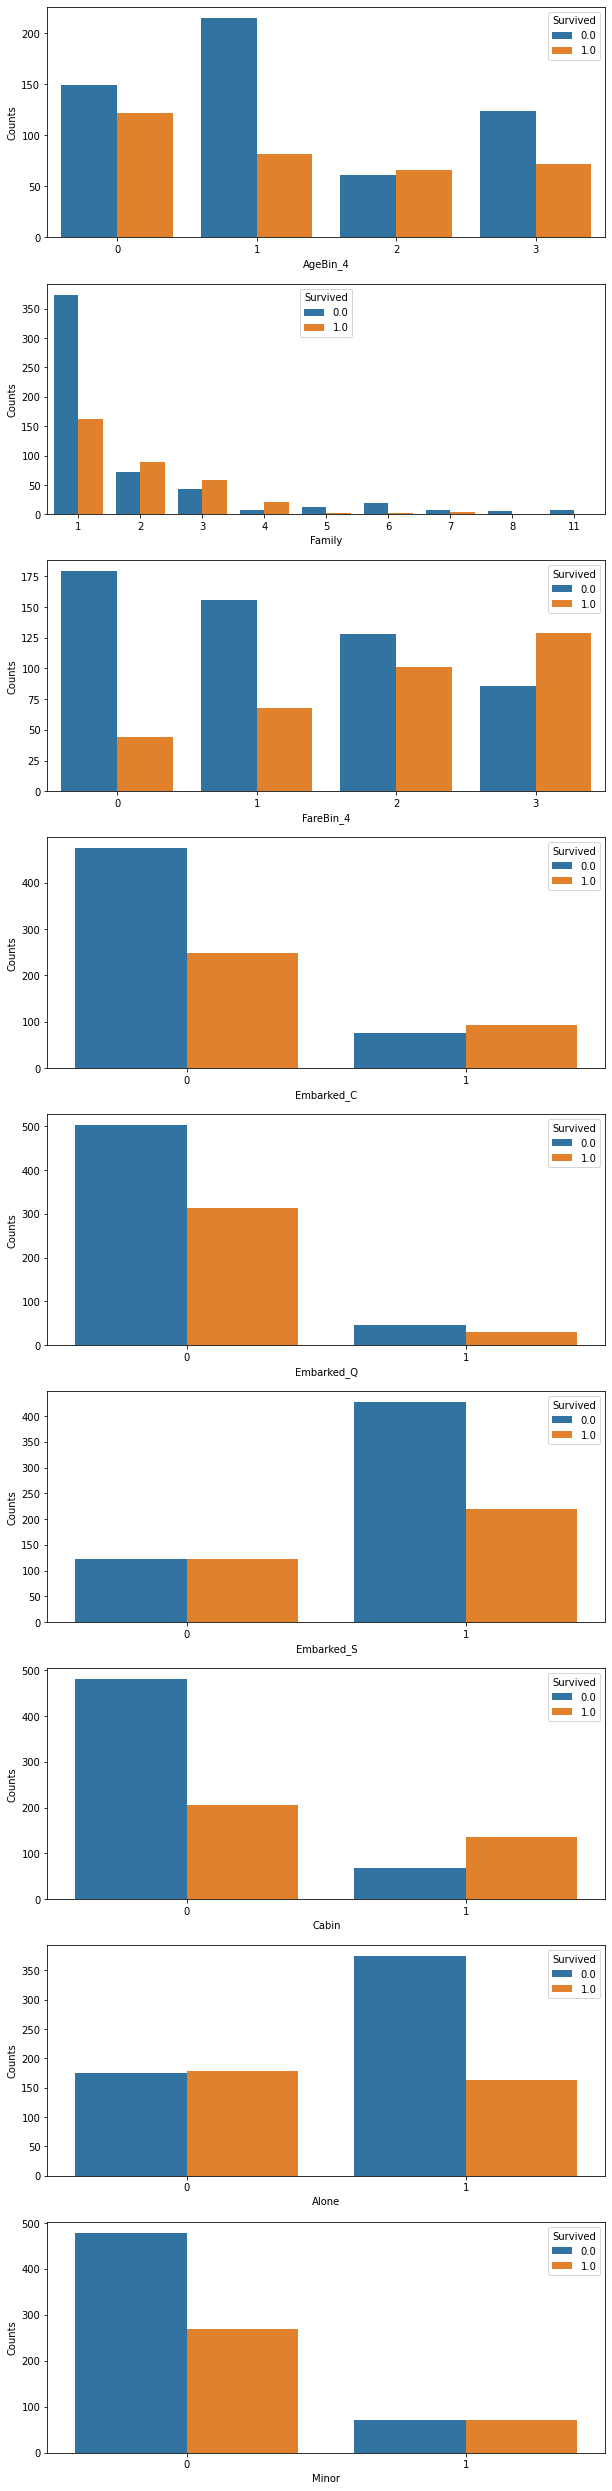

In [117]:
selected_cols = ['AgeBin_4','Family','FareBin_4','Embarked_C','Embarked_Q','Embarked_S','Cabin','Alone','Minor']

plt.figure( figsize=(10,len(selected_cols)*5) )
gs = gridspec.GridSpec(len(selected_cols),1)    
for i, col in enumerate( df_data[selected_cols] ) :        
  ax = plt.subplot( gs[i] )
  sns.countplot(x= df_data[col], hue= df_data['Survived'])
  ax.set_ylabel( 'Counts' )

plt.show()

## 模型訓練

請在此區塊後使用**一個或多個區塊**進行模型訓練，**需要**包含以下內容：

- **選擇模型**
    - 設定模型**超參數**
    - **控制隨機亂數**
- 計算**準確度（Accuracy）**
    - 使用 **5-fold cross validation**，輸出**平均準確度**
    - 最後再使用**所有**資料進行訓練並輸出**準確度**
    - 準確度必須**超越**課堂使用的範例
    
如果有進行多於一個以上的實驗，**可以保留所有**的實驗結果，但是執行時間將會納入**全部**實驗。

根據前面資料處理後可得到可能較有用的特徵：
- Sex	
- Pclass
- Age	(Bin、sc)
- Fare (Bin、sc)		
- Cabin
- Embarked (C、Q、S)
- Family
- Title
- Moinor
- Alone
- Connected_Survival

搭配前面視覺化資料分析之圖表，先選出可能較有用之特徵：
- Sex
  - 女性存活率偏高
- Pclass
  - 艙等越高存活率越高
- Age	(Bin、sc)
  - 不同區段的年齡存活率不同，且小孩存活率較高
- Fare (Bin、sc)
  - 票價越高存活率越高
- Family
  - 家庭人數在2~4存活率最高
- Title
  - 可以看到存活率 Mrs > Miss > 其他 >>> Mr 
- Connected_Survival
  - 相同票根的群組中，若有人存活，則整個群組存活率較高

其中被排除的特徵有：
- Cabin
  - 缺失太多，最後決定排除
- Embarked
  - 儘管分析上是有關聯，但做簡單實測後發現效果不好，故排除
- Moinor
  - 已包含在Age中，排除重複特徵
- Alone
  - 已包含在Family、Connected_Survival，排除重複特徵

In [118]:
# 模型訓練
from sklearn.model_selection import KFold,train_test_split  # 匯入驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.ensemble import RandomForestClassifier     # 匯入隨機森林模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

seed = 42
df_train = df_data[:len(df)]  #切分出訓練集
df_test = df_data[len(df):]  #切分出要送上Kaggle的測試集
train_y = df['Survived'] 

def fold_train(train_x, train_y, model):
  kf = KFold(n_splits=5,random_state=seed,shuffle=True)     # 設定 K 值
  kf.get_n_splits(train_x)                     # 給予資料範圍

  train_acc_list = []                       # 儲存每次訓練模型的準確度
  valid_acc_list = []                      # 儲存每次驗證模型的準確度

  for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
      train_x_split = train_x.iloc[train_index]         # 產生訓練資料
      train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
      valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
      valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
      
      model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
      
      train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
      train_acc = accuracy_score(train_y_split, train_pred_y)         # 計算訓練資料準確度
                                
      valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
      valid_acc = accuracy_score(valid_y_split, valid_pred_y)        # 計算驗證資料準確度
                                
      train_acc_list.append(train_acc)
      valid_acc_list.append(valid_acc)

  print((
      'Average train accuracy: {}\n' +
      '    min train accuracy: {}\n' +
      '    max train accuracy: {}\n' +
      'Average valid accuracy: {}\n' +
      '    min valid accuracy: {}\n' +
      '    max valid accuracy: {}').format(
      round(np.mean(train_acc_list),4),                          # 輸出平均訓練準確度
      round(np.min(train_acc_list),4),                           # 輸出最低訓練準確度
      round(np.max(train_acc_list),4),                           # 輸出最高訓練準確度
      round(np.mean(valid_acc_list),4),                          # 輸出平均驗證準確度
      round(np.min(valid_acc_list),4),                           # 輸出最低驗證準確度
      round(np.max(valid_acc_list),4)                            # 輸出最高驗證準確度
  ))

def all_train(data_x, data_y, model):
  train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.3, random_state=seed)

  model.fit(train_x, train_y)           # 訓練模型
  
  train_pred_y = model.predict(train_x)       # 確認模型是否訓練成功
  train_acc = accuracy_score(train_y, train_pred_y)         # 計算訓練資料準確度
                            
  valid_pred_y = model.predict(valid_x)       # 驗證模型是否訓練成功
  valid_acc = accuracy_score(valid_y, valid_pred_y)        # 計算驗證資料準確度

  print('Train accuracy:',round(train_acc,4))
  print('Valid accuracy:',round(valid_acc,4))

  return model


**使用 5-fold cross validation 輸出平均準確度**

解釋模型超參數的選擇理由、模型演算法:
- 使用分類模型通常表現最好的RandomForest
  - 利用多顆Decision tree投票來決定最終預測
  - Decision tree則是利用Information gain，找到最佳的分類架構
  - 實測後發現100以上的表現都差不多，因此n_estimators選擇99
  - 控制random_state，達到可以重現實驗的目的，後續模型也會這樣做

In [119]:
train_x = df_train[['Sex', 'Pclass', 'FareBin_4', 'AgeBin_4', 'Family', 'Title', 'Connected_Survival']]                 # 取出訓練資料需要分析的資料欄位  
model = RandomForestClassifier(n_estimators=99, random_state=seed)
fold_train(train_x, train_y, model)

Average train accuracy: 0.8995
    min train accuracy: 0.889
    max train accuracy: 0.906
Average valid accuracy: 0.8383
    min valid accuracy: 0.8146
    max valid accuracy: 0.8771


**使用全部資料進行訓練**
- 與剛剛的交叉一樣使用表現通常最好的RandomForest

In [120]:
train_x = df_train[['Sex', 'Pclass', 'FareBin_4', 'AgeBin_4', 'Family', 'Title', 'Connected_Survival']]
model = RandomForestClassifier(n_estimators=99, random_state=seed)
test = all_train(train_x,train_y,model)

Train accuracy: 0.8925
Valid accuracy: 0.8507


**使用多個不同模型進行訓練**

解釋模型超參數的選擇理由、模型演算法:

- KNN  (找最近的n筆資料，看它們屬於哪個類別的最多)
  - n_neighnors選擇奇數，防止同樣票數
  - 因為資料集不大，不能選擇太大的n_neighnors，實測後選擇15為較好的參數
- SVM  (畫線來區隔開不同類別的資料)
  - 'linear'、'poly'、'rbf'、'sigmoid'，選擇表現通常較好的rbf
- Naive Bayes  (使用貝氏機率來找到最有可能的類別)
- LogisticRegression  (類似Perceptron的感知器分類，畫線來區隔資料)
  - 資料特性關係，要選擇penalty = l2
- ANN  (使用類神經網路，根據loss去調整神經元的權重，達到最佳預測結果)
  - loss使用適用於二分法的binary_crossentropy
  - optimizer選擇效果好又較不需調參的adam
  - 最後一層activation使用較適合二分法的sigmoid
  - 實測epoch = 30左右不會過擬，再往上就會overfitting

In [121]:
train_x = df_train[['Sex', 'Pclass', 'FareBin_4', 'AgeBin_4', 'Family', 'Title', 'Connected_Survival']]

from sklearn.neighbors import KNeighborsClassifier         
Knn = KNeighborsClassifier(n_neighbors=15)
print('Knn:')
all_train(train_x, train_y, Knn)

from sklearn.svm import SVC         
SVM = SVC(kernel='rbf', random_state=seed)
print('\nSVM:')
all_train(train_x, train_y, SVM)

from sklearn.naive_bayes import GaussianNB         
NB = GaussianNB()
print('\nNaive Bayes:')
all_train(train_x, train_y, NB)

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty='l2')
print('\nLogisticRegression:')
all_train(train_x, train_y, LR)

print()

Knn:
Train accuracy: 0.8443
Valid accuracy: 0.8209

SVM:
Train accuracy: 0.8363
Valid accuracy: 0.8358

Naive Bayes:
Train accuracy: 0.8042
Valid accuracy: 0.8097

LogisticRegression:
Train accuracy: 0.8379
Valid accuracy: 0.8396



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                256       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


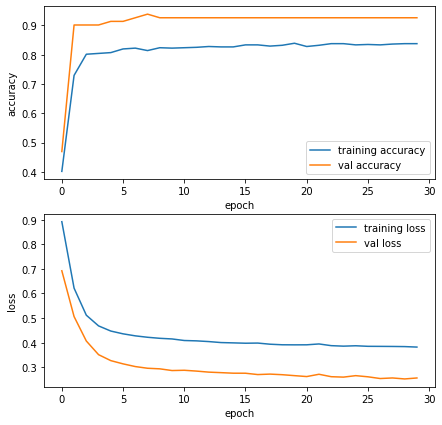

Test Accuracy = 88.89 %    loss = 0.319940


In [122]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

def plot_acc_loss(history):
  fig = plt.figure(figsize = (7,7))  
  plt.subplot(2,1,1)
  plt.plot(history.history['accuracy'], label='training accuracy')
  plt.plot(history.history['val_accuracy'], label='val accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(loc='lower right')
  plt.subplot(2,1,2)
  plt.plot(history.history['loss'], label='training loss')
  plt.plot(history.history['val_loss'], label='val loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(loc='upper right')
  plt.show()

train_x = df_train[['Sex', 'Pclass', 'FareBin_4', 'AgeBin_4', 'Family', 'Title', 'Connected_Survival']]
train_data = train_x.values
train_label = train_y.values

train_data, test_data, train_label, test_label = train_test_split(train_data, train_label, test_size=0.1, random_state=seed)

model=Sequential()
model.add(Input(shape=train_data.shape[1]))
model.add(Dense(32, activation='relu'), )
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

filepath = 'ANN.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True)
history = model.fit(
    train_data,
    train_label,
    verbose=0,
    batch_size = 32,
    epochs = 30,
    shuffle=True,
    validation_split=0.1,
    callbacks= [checkpoint])

plot_acc_loss(history)
ANN = load_model(filepath)
loss, accuracy = ANN.evaluate(test_data, test_label, verbose=0)
print("Test Accuracy = %.2f %%    loss = %f" % (accuracy * 100, loss))

**嘗試使用GridSearchCV來協助調整參數**

In [123]:
from sklearn.model_selection import GridSearchCV
train_x = df_train[['Sex','Pclass','FareBin_4','AgeBin_4','Family','Connected_Survival']]
test_x = df_test[['Sex','Pclass','FareBin_4','AgeBin_4','Family','Connected_Survival']]

n_neighbors = [3,4,5,6]
weights = ['uniform', 'distance']
leaf_size = list(range(10,30,5))
hyperparams = {'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}
gd = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
          verbose=True, cv=10, scoring = "roc_auc")
gd.fit(train_x, train_y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
0.8564802082449143
KNeighborsClassifier(leaf_size=15, n_neighbors=6)


**使用 ensemble 進行實驗**
- 運用前面所做的5種模型投票，來實測結果

In [124]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

train_x = df_train[['Sex', 'Pclass', 'FareBin_4', 'AgeBin_4', 'Family', 'Title', 'Connected_Survival']]

clf1 = KNeighborsClassifier(n_neighbors=15)
clf2 = RandomForestClassifier(n_estimators=99, random_state=seed)
clf3 = GaussianNB()
clf4 = SVC(kernel='rbf', random_state=seed)
clf5 = LogisticRegression(penalty='l2')
model = VotingClassifier(estimators=[('Knn', clf1), ('RF', clf2), ('NB', clf3), ('SVM_t', clf4), ('LR', clf5)], voting='hard')

Vote = all_train(train_x, train_y, model)

Train accuracy: 0.8507
Valid accuracy: 0.8358


**Overfitting**

使用完全無相關性的特徵進行訓練，會發生overfitting的情形

In [125]:
Overfitting_x = df_train[['PassengerId']]          
Overfitting = RandomForestClassifier(n_estimators=99, random_state=seed)
Overfitting = all_train(Overfitting_x, train_y, Overfitting)

Train accuracy: 1.0
Valid accuracy: 0.5672


**Underfitting**

使用非常少且相關係數低的特徵進行訓練，選擇表現較差的模型、參數，會發生underfirtting的情形

In [126]:
Underfitting_x = df_train[['Family','Age_sc']]                
Underfitting = SVC(kernel='sigmoid')
Underfitting = all_train(Underfitting_x, train_y, Underfitting)

Train accuracy: 0.565
Valid accuracy: 0.5709


## 加分題

請將訓練後的模型套用至 [Kaggle Titanic](https://www.kaggle.com/c/titanic/overview) `test.csv` 上，並上傳至 Kaggle 進行評分，**截圖**後**嵌入**至 `markdown` 區塊中。

ANN模型
- 送上Kaggle後準確度為80.62%

In [127]:
test_x = df_test[['Sex', 'Pclass', 'FareBin_4', 'AgeBin_4', 'Family', 'Title', 'Connected_Survival']]
test_x = test_x.values
ANN_pred = ANN.predict(test_x)
ANN_pred = ANN_pred.flatten()

submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],
             "Survived":ANN_pred.astype(int)})
submit.to_csv("ANN_submit.csv",index=False)

Vote模型 (ensemble)
  - 送上Kaggle後準確度只有77.51%
  - 推測模型已經對train資料overfitting
  - 或是Kaggle上的test資料答案有偏移

In [128]:
test_x = df_test[['Sex', 'Pclass', 'FareBin_4', 'AgeBin_4', 'Family', 'Title', 'Connected_Survival']]

vote_pred = Vote.predict(test_x)

submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],
             "Survived":vote_pred.astype(int)})
submit.to_csv("Vote_submit.csv",index=False)

Knn模型
 - 送上Kaggle後準確度為81.82%，為三種模型裡面最優

In [129]:
train_x = df_train[['Sex','Pclass','FareBin_4','AgeBin_4','Family','Connected_Survival']]
test_x = df_test[['Sex','Pclass','FareBin_4','AgeBin_4','Family','Connected_Survival']]

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() #使用Knn模型故將資料做標準化
train_x = std_scaler.fit_transform(train_x)
test_x = std_scaler.transform(test_x)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, leaf_size=26)
knn.fit(train_x, train_y)
knn_pred = knn.predict(test_x)

submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],
             "Survived":knn_pred.astype(int)})
submit.to_csv("submit.csv",index=False)

**送出submit.csv到Kaggle上評分後，獲得0.81578的分數，排名為193/14537 = Top1.3%**

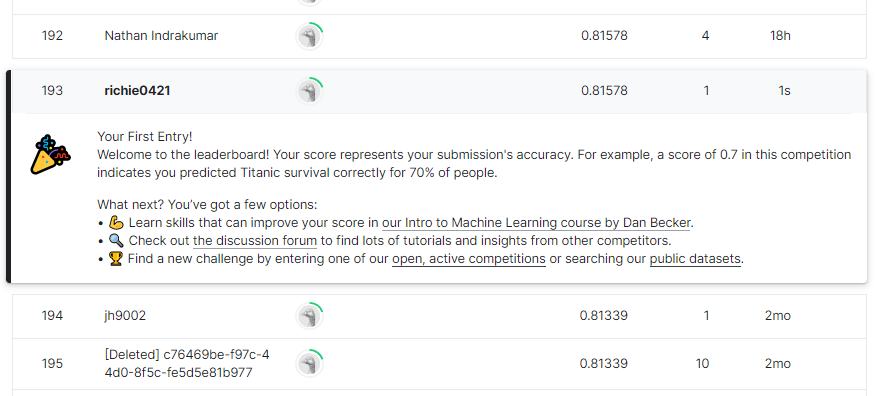

In [130]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 20.97902750968933
